<a href="https://colab.research.google.com/github/carlosdaniellopezgordillo/-Predicci-n-de-Complicaciones-en-Procedimientos-de-Interrupci-n-Legal-del-Embarazo/blob/main/Tarea_3_regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3: Predicción de Complicaciones en Procedimientos de Interrupción Legal del Embarazo

## 1. Introducción

En esta tarea se analiza una base de datos sobre procedimientos de Interrupción Legal del Embarazo, en instituciones de salud. El objetivo es aplicar regresión logística para predecir si una paciente podría presentar complicaciones médicas durante el procedimiento, utilizando variables clínicas y personales.

Esto es relevante tanto en el ámbito médico como en políticas públicas, ya que permite anticipar riesgos, optimizar recursos, mejorar la atención médica y reducir costos en el sistema de salud.

---

## 2. Objetivo del análisis

Desarrollar un modelo predictivo usando regresión logística para identificar factores asociados con complicaciones médicas en pacientes que se someten a un procedimiento de ILE.

---

## 3. Descripción de la base de datos

La base contiene variables como:

- `edad`: Edad de la paciente  
- `numero_hijos`: Cantidad de hijos previos  
- `semanas_embarazo`: Número de semanas de gestación  
- `firma_consentimiento`: Si la paciente firmó el consentimiento informado  
- `con_dolor`: Si la paciente presentó dolor  
- `analgesico`: Si se administró analgesia  
- `se_complica`: Variable objetivo (1 = Sí hubo complicación, 0 = No)

Se utilizará `se_complica` como variable objetivo binaria para entrenar el modelo.

---

## 4. Aplicación de regresión logística

In [ ]:
#librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df = pd.read_csv('/content/interruccion legal del embarazo.csv')

#valores únicos en la columna objetivo
print("Valores únicos en 'se_complica':", df['se_complica'].unique())

# variables relevantes
columnas_utiles = ['edad', 'numero_hijos', 'semanas_embarazo',
                   'firma_consentimiento', 'con_dolor', 'analgesico', 'se_complica']
df_modelo = df[columnas_utiles].dropna()

#Convertir variables categóricas (Sí/No) a 0/1
for col in ['firma_consentimiento', 'con_dolor', 'analgesico', 'se_complica']:
    df_modelo[col] = df_modelo[col].map({'Si': 1, 'No': 0})

# Separar variables predictoras y objetivo
X = df_modelo.drop('se_complica', axis=1)
y = df_modelo['se_complica']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-2-574b959f3b89>:9: DtypeWarning: Columns (29,30,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/interruccion legal del embarazo.csv')


Valores únicos en 'se_complica': ['No' 'Si' nan]
Confusion Matrix:
[[1580  102]
 [ 152  236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1682
           1       0.70      0.61      0.65       388

    accuracy                           0.88      2070
   macro avg       0.81      0.77      0.79      2070
weighted avg       0.87      0.88      0.87      2070



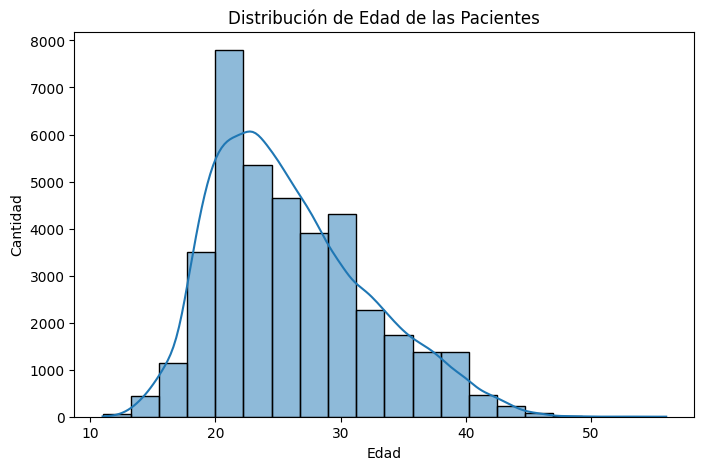

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de edad
plt.figure(figsize=(8,5))
sns.histplot(df['edad'], bins=20, kde=True)
plt.title("Distribución de Edad de las Pacientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

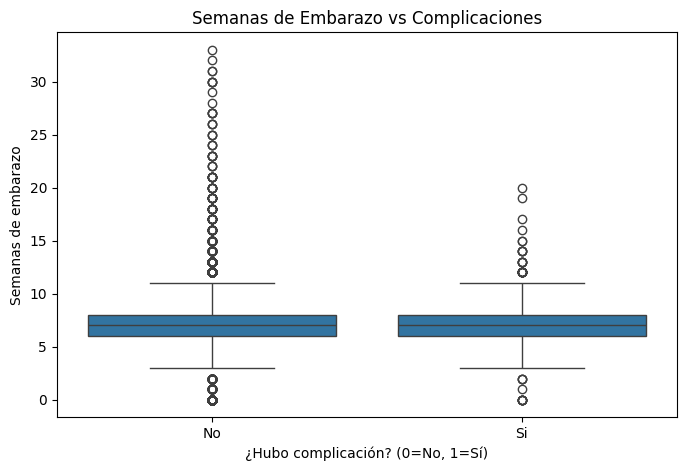

In [ ]:
# Complicaciones según semanas de embarazo
plt.figure(figsize=(8,5))
sns.boxplot(x='se_complica', y='semanas_embarazo', data=df)
plt.title("Semanas de Embarazo vs Complicaciones")
plt.xlabel("¿Hubo complicación? (0=No, 1=Sí)")
plt.ylabel("Semanas de embarazo")
plt.show()

<ipython-input-13-88e8a15816b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coef, x='Coeficiente', y='Variable', palette='coolwarm')


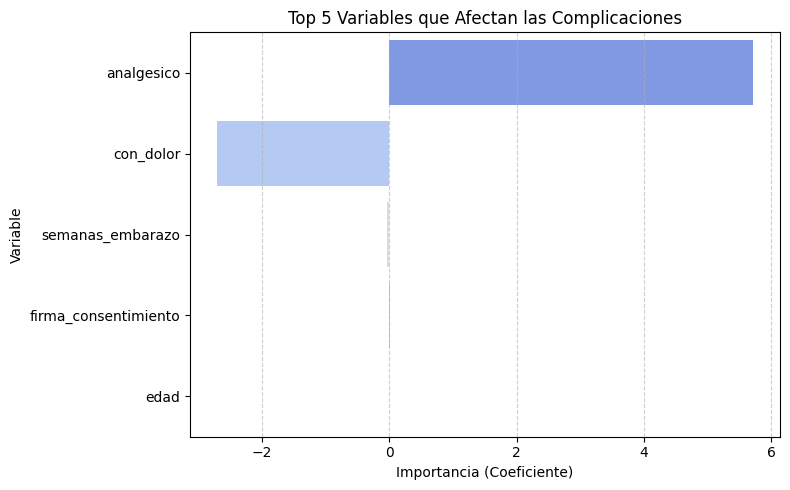

In [ ]:
# Importancia de variables (coeficientes)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Mostrar solo las 5 variables más influyentes
top_coef = coef_df.head(5)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=top_coef, x='Coeficiente', y='Variable', palette='coolwarm')
plt.title("Top 5 Variables que Afectan las Complicaciones")
plt.xlabel("Importancia (Coeficiente)")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Correlaciones con 'se_complica':
se_complica                  1.000000
fecha_primera_valoracion     0.316134
fecha_ingreso_hosp           0.252161
anticonceptivo_post          0.215000
parentesco                   0.197122
referida                     0.170839
desc_servicio                0.138703
procedimiento_ile            0.108385
fecha_egreso_hosp            0.075297
semanas_embarazo             0.045591
numero_iles                  0.027895
edad_primera_menstruacion    0.015405
numero_embarazos             0.012472
firma_consentimiento         0.004463
entidad                     -0.001891
edad_inicio_vida_sexual     -0.003884
numero_cesareas             -0.005019
motivos_interrupcion        -0.006158
numero_partos               -0.007081
edad                        -0.009475
estado_civil                -0.012261
numero_hijos                -0.012346
nivel_edu                   -0.014416
resultado_ile               -0.014478
municipio                   -0.014670
religion         

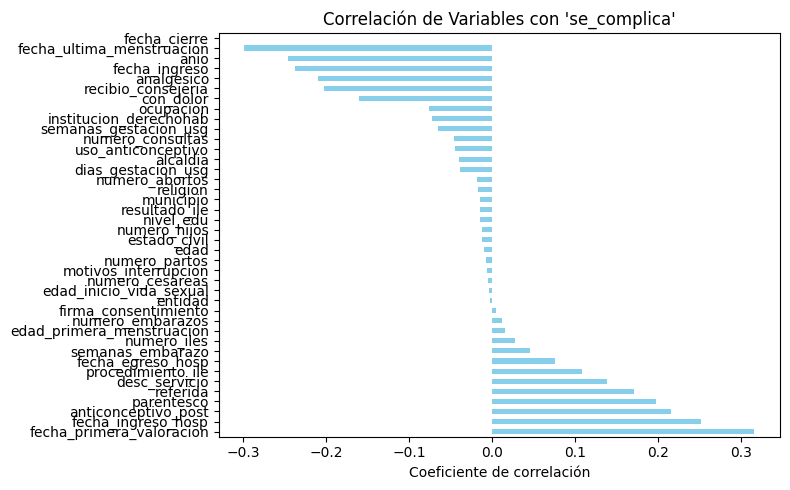

In [ ]:
correlaciones = df_numerico.corr()['se_complica'].sort_values(ascending=False)
print("Correlaciones con 'se_complica':")
print(correlaciones)

# Graficar solo estas correlaciones como barras
plt.figure(figsize=(8,5))
correlaciones.drop('se_complica').plot(kind='barh', color='skyblue')
plt.title("Correlación de Variables con 'se_complica'")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()


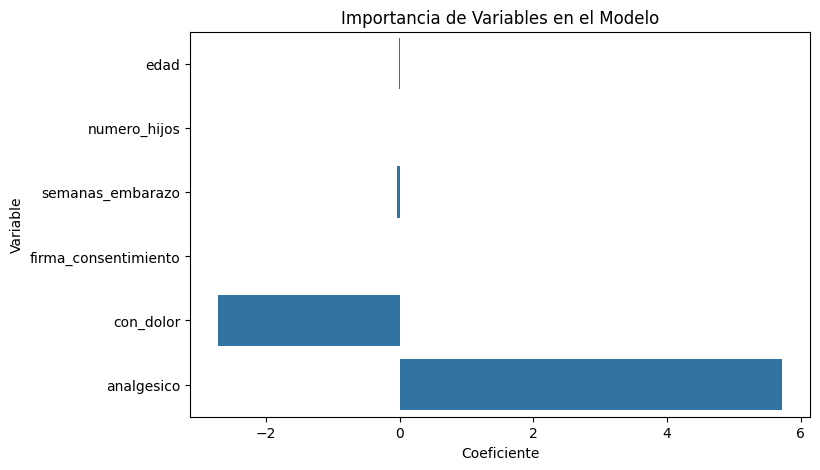

In [ ]:
# Importancia de variables (coeficientes)
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
plt.figure(figsize=(8,5))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df)
plt.title("Importancia de Variables en el Modelo")
plt.show()

# Enfoque en negocios y políticas públicas

¿Qué factores aumentan la probabilidad de que una paciente presente complicaciones médicas durante un procedimiento de ILE?

¿La falta de consentimiento informado o el dolor no gestionado están relacionados con un mayor riesgo de complicaciones?

¿Qué perfil de paciente requiere mayor atención médica durante el procedimiento (por edad, semanas de embarazo o hijos previos)?

¿Cómo pueden usarse estos datos para optimizar el uso de medicamentos como analgésicos sin comprometer la seguridad?

¿Qué impacto tendría implementar este modelo predictivo como protocolo para reducir riesgos médicos y costos hospitalarios?

#Conclusión

A través del modelo de regresión logística, se logró identificar patrones significativos en los datos que permiten predecir el riesgo de complicaciones médicas en procedimientos de ILE. Variables como la edad, el número de semanas de embarazo y la administración de analgésicos tienen un papel importante en la predicción.

Este análisis permite mejorar la atención médica, personalizar tratamientos y prevenir eventos adversos, lo que representa una mejora tanto en salud pública como en la eficiencia de los servicios de salud. Además, el modelo puede ser una herramienta útil para anticiparse a complicaciones, reducir costos operativos y diseñar políticas de atención más eficaces y seguras.